In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Passengers_satisfaction/test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [ ]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type']) 
df['Type of Travel'] = le.fit_transform(df['Type of Travel']) 
df['Class'] = le.fit_transform(df['Class'])
df['satisfaction']=le.fit_transform(df['satisfaction'])

In [ ]:
quant = df.quantile(q=[0.25,0.75],axis=0)
quant

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0.25,6493.75,32170.50,0.0,0.0,27.0,0.0,0.0,414.0,2.0,2.0,...,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0
0.75,19481.25,97584.25,1.0,0.0,51.0,1.0,1.0,1744.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0,1.0


In [ ]:
df['Customer Type'] = np.where(df['Customer Type']>0.1,8, df['Customer Type'])
df['Customer Type'] = np.where(df['Customer Type']<0,0,df['Customer Type'])
df['Flight Distance'] = np.where(df['Flight Distance']>3708,1744, df['Flight Distance']) 
df['Flight Distance'] = np.where(df['Flight Distance']<8,414,df['Flight Distance'])
df['Checkin service'] = np.where(df['Checkin service']>4.9,4.0, df['Checkin service']) 
df['Checkin service'] = np.where(df['Checkin service']<2,3.0,df['Checkin service'])
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes']>10,12, df['Departure Delay in Minutes']) 
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes']<0,3.0,df[ 'Departure Delay in Minutes'])
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes']>10,13, df['Arrival Delay in Minutes']) 
df['Arrival Delay in Minutes'] =  np.where(df['Arrival Delay in Minutes']<0,3.0,df['Arrival Delay in Minutes'])


In [ ]:
df.describe()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25893.000000,25976.000000
mean,12987.500000,65005.657992,0.492917,1.47798,39.620958,0.305590,0.592778,1140.492185,2.724746,3.046812,...,3.357753,3.385664,3.350169,3.633238,3.359293,3.649253,3.286226,3.977248,4.389101,0.438982
std,7498.769632,37611.526647,0.499959,3.10480,15.135685,0.460666,0.623703,906.226663,1.335384,1.533371,...,1.338299,1.282088,1.318862,1.176525,0.690865,1.180681,1.319330,5.245509,5.724003,0.496272
min,0.000000,17.000000,0.000000,0.00000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6493.750000,32170.500000,0.000000,0.00000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,12987.500000,65319.500000,0.000000,0.00000,40.000000,0.000000,1.000000,849.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,19481.250000,97584.250000,1.000000,0.00000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,25975.000000,129877.000000,1.000000,8.00000,85.000000,1.000000,2.000000,3708.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,12.000000,13.000000,1.000000


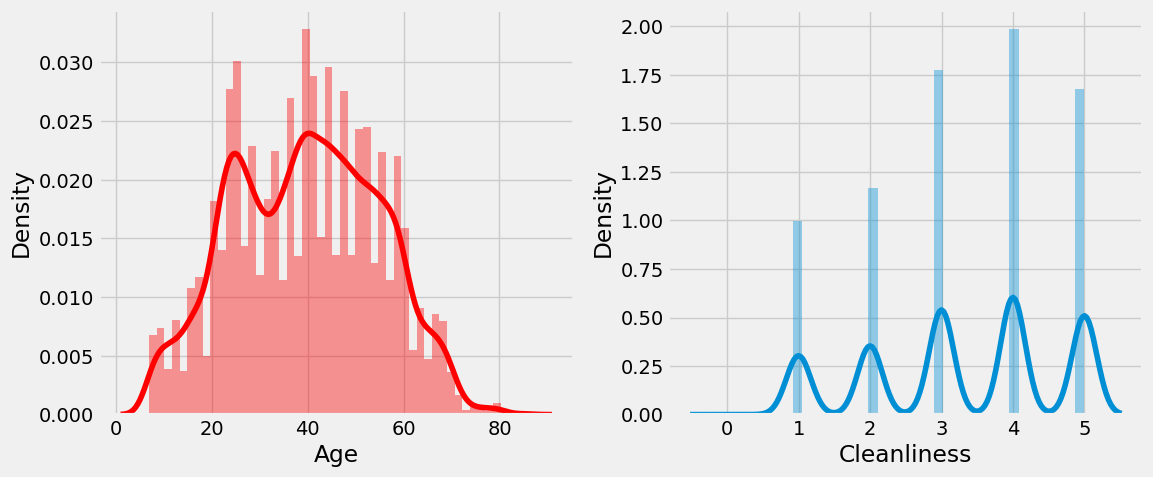

In [ ]:
plt.figure(figsize = (12,5)) 
plt.subplot(121)
sns.distplot(df['Age'], color = 'r')
plt.subplot(122) 
sns.distplot(df[ 'Cleanliness']) 
plt.show()

<Axes: ylabel='count'>

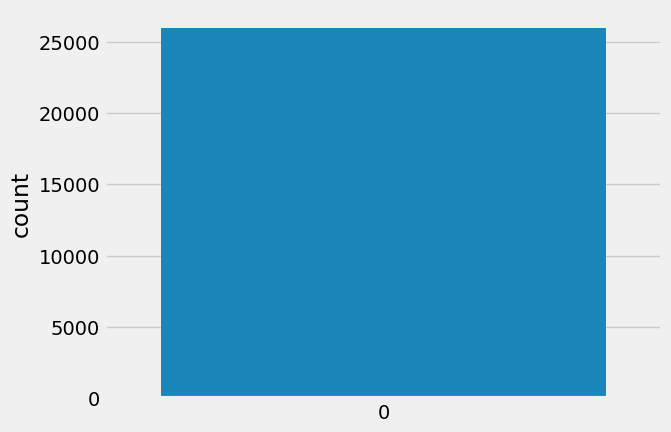

In [ ]:
sns.countplot(df['satisfaction'])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,df['satisfaction'],test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((20780, 24), (20780,))

In [ ]:
X_test.shape, y_test.shape

((5196, 24), (5196,))

In [ ]:
def dt(X_train,y_train,X_test,y_test):
  reg3 = DecisionTreeClassifier(criterion='entropy')
  reg3.fit(X_train,y_train)
  print('accuracy')
  print('Training accuracy',reg3.score (X_train,y_train))
  print('test accuracy= ', reg3.score (X_test,y_test))
  y_test_pred = reg3.predict(X_test)
  print('Test data confusion matrix: ',confusion_matrix(y_test,y_test_pred))
  print('test data classification report:', classification_report(y_test,y_test_pred))
  return reg3

In [ ]:
def RF(X_train, y_train,X_test, y_test):
  reg4 = RandomForestClassifier()
  reg4.fit(X_train, y_train)
  print('Accuracy:')
  print('Training accuracy = ',reg4.score (X_train,y_train))
  print('Test accuracy = ',reg4.score (X_test,y_test))
  y_test_pred = reg4.predict(X_test)
  print('Test data confusion_matrix: ', confusion_matrix(y_test,y_test_pred))
  print('Test data classification_report : ',classification_report(y_test,y_test_pred))
  return reg4

In [ ]:
def knn(X_train, y_train,X_test, y_test): 
  reg = KNeighborsClassifier(n_neighbors=5)
  reg.fit(X_train, y_train)
  print('Accuracy:')
  print('Training accuracy',reg.score(X_train,y_train))
  print('Test accuracy' ,reg.score (X_test, y_test))
  y_test_pred =  reg.predict(X_test)
  print('Test data confusion_matrix', confusion_matrix(y_test,y_test_pred))
  print('Test data classification_report: ',classification_report (y_test,y_test_pred))
  return reg

In [ ]:
from sklearn.linear_model import LogisticRegression

def lg(X_train,y_train,X_test,y_test): 
  reg1 = LogisticRegression()
  reg1.fit(X_train,y_train) 
  print('accuracy')
  print('Training accuracy= ', reg1.score (X_train,y_train))
  print('test accuracy= ', reg1.score (X_test,y_test))
  y_test_pred = reg1.predict(X_test)
  print('Test data confusion matrix: ',confusion_matrix(y_test,y_test_pred))
  print('test data classification report:', classification_report(y_test,y_test_pred))
  return reg1

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_iris
import joblib
model = knn(X_train, y_train, X_test, y_test)
filename = 'trained_model.pkl'
joblib.dump(model, filename)
loaded_model = joblib.load(filename)
# Test new data
predictions = loaded_model.predict([[1,2,1,3,1,0,7,5,0,1,1,1,1,1,1,1,1,1,1,1,1]])
print(predictions)